# WeatherPy

***

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 558


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" 

city_url = f"https://api.openweathermap.org/data/2.5/weather?appid=d1d93f95512209be7dea73ce2908a07d&q={city}&units=metric"

weather = requests.get(city_url)
json = weather.json()
json

{'coord': {'lon': -36.5092, 'lat': -54.2811},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 8.73,
  'feels_like': 6.31,
  'temp_min': 8.73,
  'temp_max': 8.73,
  'pressure': 1008,
  'humidity': 60,
  'sea_level': 1008,
  'grnd_level': 1004},
 'visibility': 10000,
 'wind': {'speed': 4.27, 'deg': 251, 'gust': 5.18},
 'clouds': {'all': 95},
 'dt': 1706555451,
 'sys': {'country': 'GS', 'sunrise': 1706510663, 'sunset': 1706567612},
 'timezone': -7200,
 'id': 3426466,
 'name': 'Grytviken',
 'cod': 200}

In [4]:
# Set the API base 
url = "URLhttps://api.openweathermap.org/data/2.5/weather?" 
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?appid=d1d93f95512209be7dea73ce2908a07d&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tazovsky
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | shar
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | polyarnyy
Processing Record 6 of Set 1 | kapa'a
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | fort bragg
Processing Record 10 of Set 1 | talcahuano
Processing Record 11 of Set 1 | ust-nera
Processing Record 12 of Set 1 | qaqortoq
Processing Record 13 of Set 1 | ebon
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | ta`u
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | sao joao da barra
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | vorgashor
Processing Record 21 of Set 1 | kapuskasing
Processing Record 22 of Set 1 | taiohae
City not found. 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          528
Lat           528
Lng           528
Max Temp      528
Humidity      528
Cloudiness    528
Wind Speed    528
Country       528
Date          528
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tazovsky,67.4667,78.7000,-21.37,90,80,4.37,RU,1706555452
1,port-aux-francais,-49.3500,70.2167,3.71,72,99,16.49,TF,1706555453
2,shar,49.5886,81.0453,-18.09,99,40,1.40,KZ,1706555453
3,edinburgh of the seven seas,-37.0676,-12.3116,16.84,75,40,9.91,SH,1706555454
4,polyarnyy,69.1989,33.4478,1.28,67,100,15.44,RU,1706555454


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("WeatherPy_Output/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("WeatherPy_Output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,-21.37,90,80,4.37,RU,1706555452
1,port-aux-francais,-49.3500,70.2167,3.71,72,99,16.49,TF,1706555453
2,shar,49.5886,81.0453,-18.09,99,40,1.40,KZ,1706555453
3,edinburgh of the seven seas,-37.0676,-12.3116,16.84,75,40,9.91,SH,1706555454
4,polyarnyy,69.1989,33.4478,1.28,67,100,15.44,RU,1706555454


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

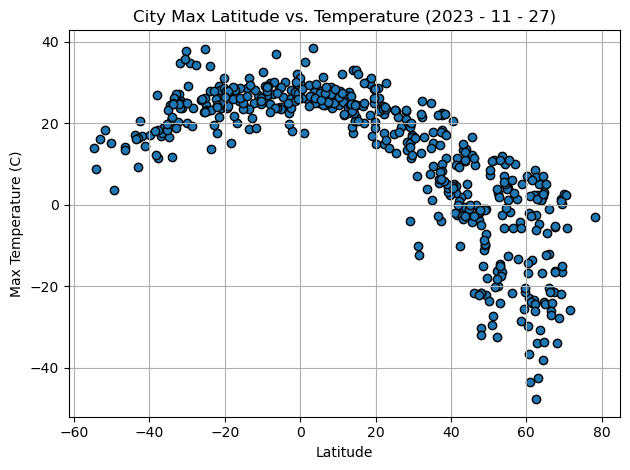

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023 - 11 - 27)")
plt.tight_layout()

# Save the figure
plt.savefig("WeatherPy_Output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

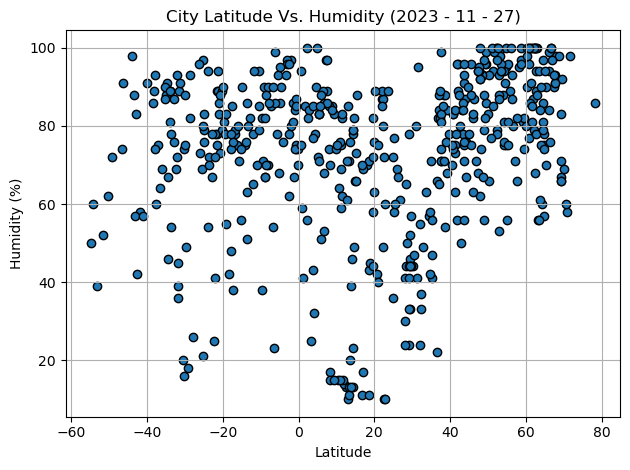

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs. Humidity (2023 - 11 - 27)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("WeatherPy_Output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

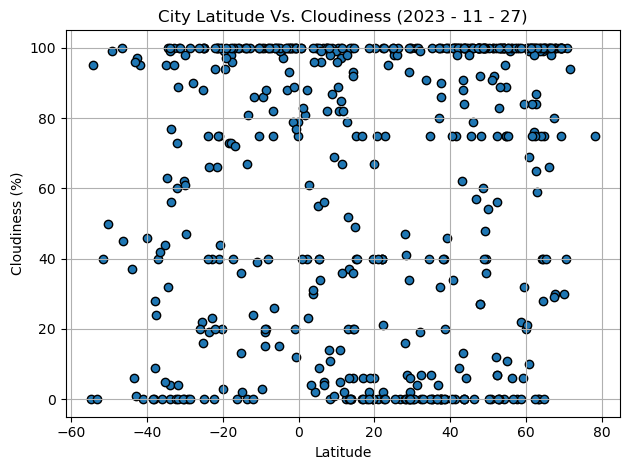

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs. Cloudiness (2023 - 11 - 27)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("WeatherPy_Output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

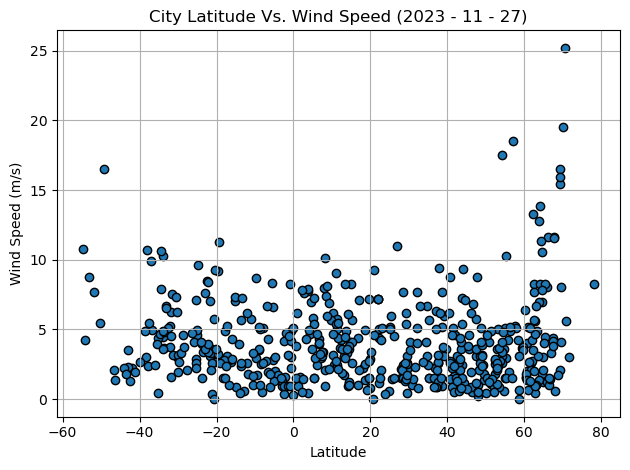

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs. Wind Speed (2023 - 11 - 27)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("WeatherPy_Output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,-21.37,90,80,4.37,RU,1706555452
2,shar,49.5886,81.0453,-18.09,99,40,1.40,KZ,1706555453
4,polyarnyy,69.1989,33.4478,1.28,67,100,15.44,RU,1706555454
5,kapa'a,22.0752,-159.3190,24.18,87,40,7.20,US,1706555455
8,fort bragg,35.1390,-79.0060,15.08,41,0,5.66,US,1706555412


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,3.71,72,99,16.49,TF,1706555453
3,edinburgh of the seven seas,-37.0676,-12.3116,16.84,75,40,9.91,SH,1706555454
6,adamstown,-25.0660,-130.1015,24.55,76,100,4.59,PN,1706555456
7,grytviken,-54.2811,-36.5092,8.73,60,95,4.27,GS,1706555451
9,talcahuano,-36.7167,-73.1167,17.62,64,42,4.97,CL,1706555457


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6642481134343281


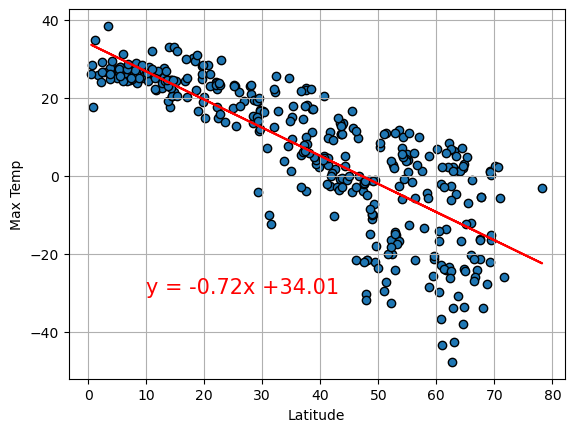

In [49]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (10,-30), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("WeatherPy_Output/Fig5.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.31656567259900775


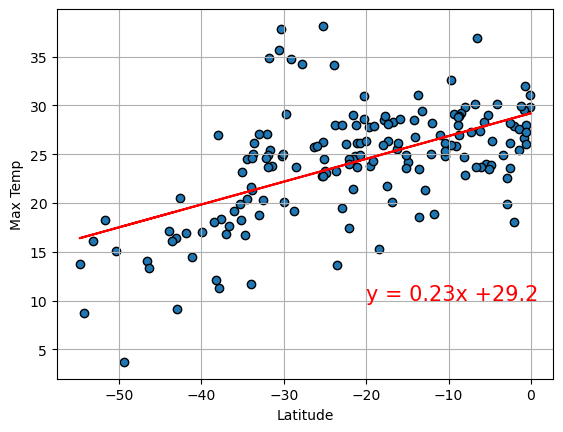

In [50]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (-20,10), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("WeatherPy_Output/Fig6.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19808982452838836


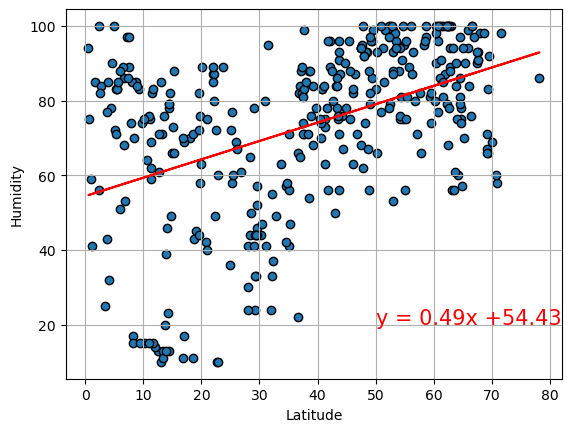

In [52]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (50,20), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("WeatherPy_Output/Fig7.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.04551502851239833


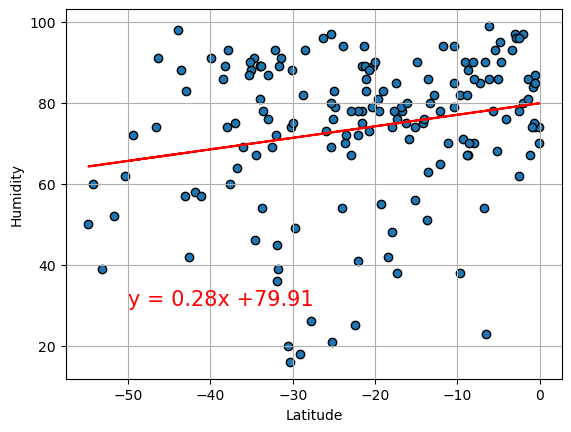

In [56]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (-50,30), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("WeatherPy_Output/Fig8.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04922499380713158


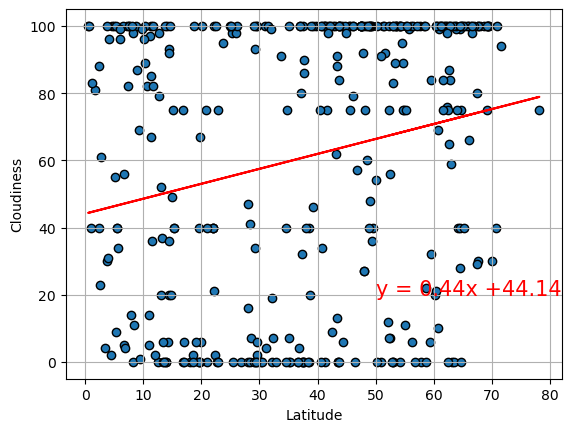

In [57]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (50,20), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("WeatherPy_Output/Fig9.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.09479402283148641


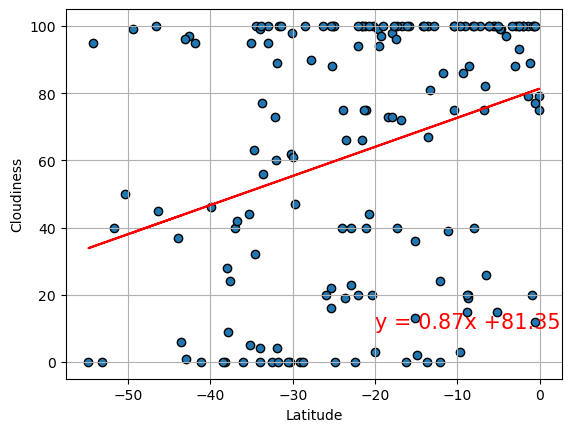

In [58]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (-20,10), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("WeatherPy_Output/Fig10.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.015856546338059146


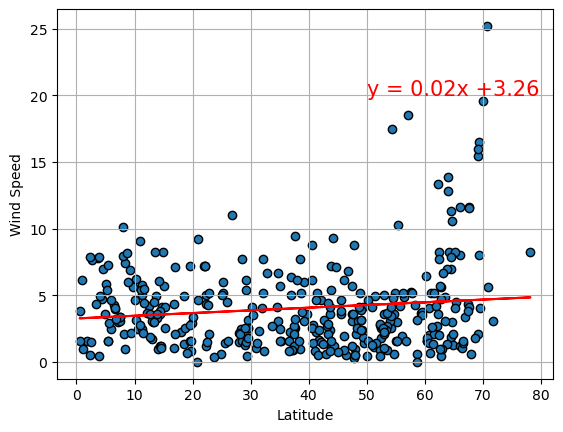

In [59]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (50,20), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("WeatherPy_Output/Fig11.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.08525626772462537


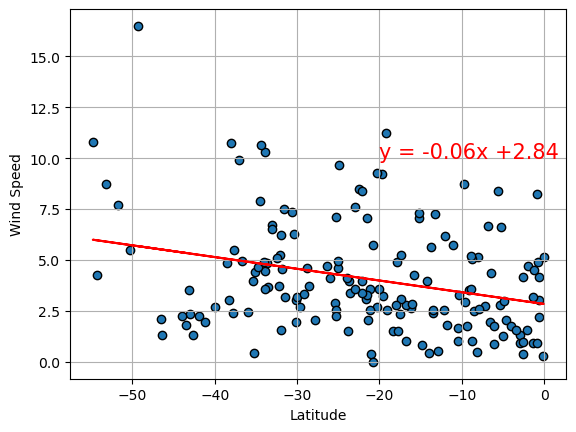

In [60]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (-20,10), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("WeatherPy_Output/Fig12.png")

# Print r value
print(f"The r-value is: {rvalue**2}")